In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, r2_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score
import itertools
import joblib
from chefboost import Chefboost as chef
import time

In [8]:
model_info = {
    'model_name': 'Decision Tree C4.5',
    'file_name': 'model_dt_c4.5.pkl',
    'prepared_by': 'Digital Khalid',
    'library': 'Chefboost',
    'classifier': 'C4.5',
    'normalization': 'Standard Scaler (Z-Score)',
    'data_file': 'flows.csv',
    'features': ['src_port', 'dst_port', 'protocol', 'first_pkt_size'],
    'target': ['Decision'],
}

In [4]:
# Read data file
input_file = model_info['data_file']
flows = pd.read_csv(input_file)

In [5]:
# Replace values in elephant, 1 with "elephant" and 0 with "mice"
flows['elephant'] = flows['elephant'].replace({1: 'elephant', 0: 'mice'})

# Rename the target column as Decision
flows.rename(columns = {'elephant':'Decision'}, inplace = True)

In [10]:
features = model_info['features']
target = model_info['target']

X = flows[features+target]

In [11]:
print(f'features (X)\n{X}')

features (X)
         src_port  dst_port  protocol  first_pkt_size  Decision
0            1999     54524         6              66      mice
1               0         0         1              70  elephant
2           50005      3479        17             183  elephant
3           44734       443         6              54      mice
4           43332      3128         6              54      mice
...           ...       ...       ...             ...       ...
1815567        80     12256         6              66      mice
1815568         0         0         1              60      mice
1815569         0         0         1              60      mice
1815570     44843      2375         6              54      mice
1815571     50355     43527         6              58      mice

[1815572 rows x 5 columns]


In [12]:
# Data Normalization
scaler = StandardScaler()

# Fit the scaler on the training set and transform the training set
X_norm = scaler.fit_transform(X[features])
X_norm = pd.DataFrame(X_norm, columns=features)
X_norm[target] = X[target]
X_norm

,src_port,dst_port,protocol,first_pkt_size,Decision
0,-1.128552,2.334849,-0.034486,-0.103479,mice
1,-1.214389,-0.676202,-1.342653,-0.059617,elephant
2,0.932816,-0.484076,2.843482,1.179494,elephant
3,0.706480,-0.651737,-0.034486,-0.235066,mice
4,0.646279,-0.503460,-0.034486,-0.235066,mice
...,...,...,...,...,...
1815567,-1.210954,0.000627,-0.034486,-0.103479,mice
1815568,-1.214389,-0.676202,-1.342653,-0.169273,mice
1815569,-1.214389,-0.676202,-1.342653,-0.169273,mice
1815570,0.711161,-0.545044,-0.034486,-0.235066,mice


In [13]:
flows['Decision'].value_counts()/ flows.shape[0] * 100

mice        99.904823
elephant     0.095177
Name: Decision, dtype: float64

### C4.5 Decision Tree

In [14]:
X_train, X_test = train_test_split(X_norm, test_size=0.2, random_state=1, stratify=X[target])

In [15]:
X_train['Decision'].value_counts() * 100/ X_train.shape[0]

mice        99.904851
elephant     0.095149
Name: Decision, dtype: float64

In [16]:
X_test['Decision'].value_counts() * 100/ X_test.shape[0]

mice        99.904713
elephant     0.095287
Name: Decision, dtype: float64

In [17]:
# define model
config = {
    'algorithm': 'C4.5',
    'enableParallelism': True,
    'enableMultitasking': True,
    'enableRandomForest': False,
    'num_of_trees': 1,
    'max_depth': 5,
    'min_samples': 5,  
}

start_time = time.time()

model = chef.fit(X_norm, config=config)

runtime = (time.time() - start_time)
print(f'Runtime: {runtime} seconds')

[INFO]:  4 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  36.708019495010376  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  99.90482338348465 % on  1815572  instances
Labels:  ['mice' 'elephant']
Confusion matrix:  [[1813843, 1727], [1, 1]]
Precision:  99.9049 %, Recall:  99.9999 %, F1:  99.9524 %
Runtime: 126.86706447601318 seconds


In [18]:
evaluation = chef.evaluate(model, X_test, task="test")

-------------------------
Evaluate  test set
-------------------------
Accuracy:  99.9047133828126 % on  363115  instances
Labels:  ['mice' 'elephant']
Confusion matrix:  [[362769, 346], [0, 0]]
Precision:  99.9047 %, Recall:  100.0 %, F1:  99.9523 %


Decision rule:  outputs/rules/rules.py


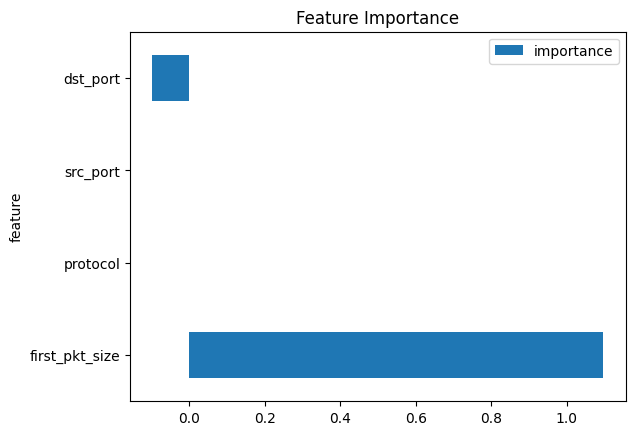

In [19]:
rules = "outputs/rules/rules.py"
fi = chef.feature_importance(rules).set_index("feature")
fi.plot(kind="barh", title="Feature Importance");

### Save Model File

In [20]:
joblib.dump(model, model_info['file_name'])

TypeError: cannot pickle 'module' object

### Load Model File

In [98]:
model = joblib.load(model_info['file_name'])

There is no model to save.


{'trees': [<module 'outputs/rules/rules' from 'D:\\My Businesses\\Programming\\Projects\\Python\\Resource-Aware Traffic Steering in Service Function Chaining\\1. Data Preparation\\outputs/rules/rules.py'>],
 'alphas': [],
 'config': {'algorithm': 'C4.5',
  'enableParallelism': True,
  'enableRandomForest': False,
  'num_of_trees': 5,
  'enableMultitasking': False,
  'enableGBM': False,
  'epochs': 10,
  'learning_rate': 1,
  'max_depth': 3,
  'enableAdaboost': False,
  'num_of_weak_classifier': 4,
  'num_cores': 4},
 'nan_values': [['src_port', None],
  ['dst_port', None],
  ['protocol', None],
  ['first_pkt_size', None]]}